In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("placement.csv")

In [57]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

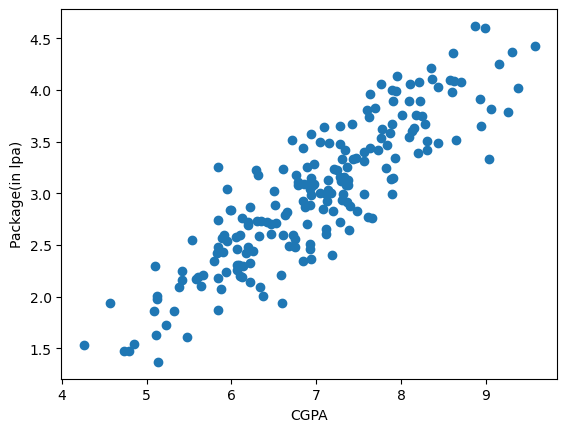

In [70]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel('Package(in lpa)')

In [72]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [73]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [74]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [86]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [87]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package in lpa')

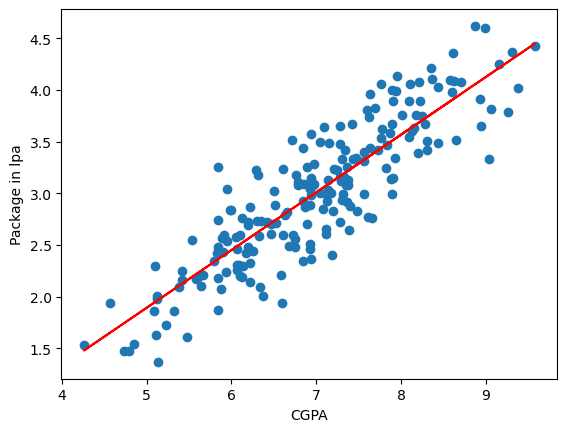

In [88]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train),color ="red")
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')

In [91]:
m = lr.coef_ # This is m value or slope

In [93]:
b = lr.intercept_ # This is y intercept

In [94]:

# y = mx + b

m * 8.58 + b

array([3.89111601])

In [95]:
m * 9.5 + b

array([4.40443183])

In [96]:
m * 100 + b

array([54.89908542])

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
y_pred = lr.predict(X_test)

In [101]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [102]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [103]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [106]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [107]:
print("r2 score", r2_score(y_test, y_pred))

r2 score 0.780730147510384


In [108]:
# Ajusted r2 score

In [109]:
r2 = r2_score(y_test, y_pred)

In [110]:
X_test.shape

(40, 1)

In [111]:
1 - (1-r2)*(40 - 1) / (40-1-1)

0.7749598882343415

In [112]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.000347,3.26
1,5.12,0.149464,1.98
2,7.82,0.647189,3.25
3,7.42,0.913682,3.67
4,6.94,0.651423,3.57


Text(0, 0.5, 'Package(in lpa)')

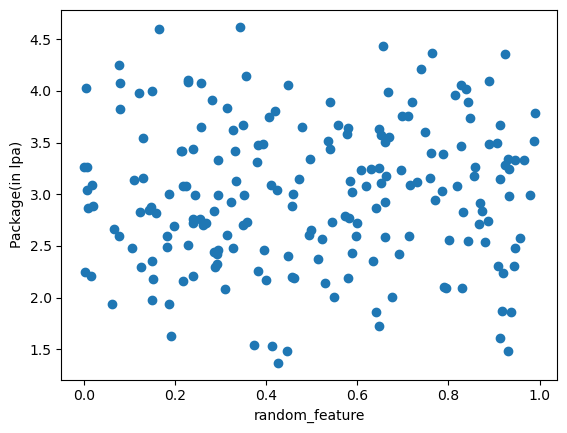

In [117]:
plt.scatter(new_df1['random_feature'],df['package'])
plt.xlabel("random_feature")
plt.ylabel('Package(in lpa)')

In [118]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [120]:
lr = LinearRegression()

In [121]:
lr.fit(X_train,y_train)

LinearRegression()

In [122]:
y_pred = lr.predict(X_test)

In [123]:
print("r2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

r2 score 0.7805199030601785


In [124]:
1 - (1-r2)*(40 - 1) / (40-1-1)

0.7747441110354464

In [125]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [126]:
new_df2.sample(5)

,cgpa,iq,package
149,8.28,4.07,3.67
118,7.40,3.68,2.88
164,9.06,4.82,3.82
139,7.19,1.70,2.40
72,7.78,4.72,3.62


Text(0, 0.5, 'Package(in lpa)')

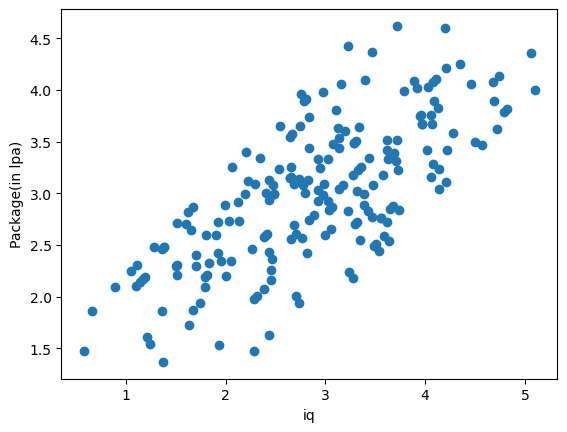

In [127]:
plt.scatter(new_df2['iq'],df['package'])
plt.xlabel("iq")
plt.ylabel('Package(in lpa)')

In [129]:
np.random.randint(-100,100)

-66

In [130]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [132]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [133]:
print("r2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

r2 score 0.858326300979501


In [134]:
1 - (1-r2)*(40 - 1) / (40-1-1)

0.8545980457421195